In [470]:
#Neccessary Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import datetime
import yahoo_fin.stock_info as yahoo_fin
from bs4 import BeautifulSoup
import requests
import scipy.stats
import pylab

In [471]:
#Get's the Stock Sticker the user wants
user_stock = input("Pick a Dividend Paying Stock's Ticker Symbol: ")
user_stock = user_stock.upper()

Pick a Dividend Paying Stock's Ticker Symbol: cl


In [472]:
if(user_stock == 'V'):
    sector = 'Technology'
    sec = 'Technology'
    
    print(f'The sector for {user_stock}: ',sector)
    print(' ')
    print(f'The business summary for {user_stock} is:',sec)
else:
    sec = yahoo_fin.get_company_info(user_stock)
    sector = sec['Value'][1]
    
    print(f'The sector for {user_stock}: ',sector)
    print(' ')
    print(f'The business summary for {user_stock} is:',sec['Value'][5])

The sector for CL:  Consumer Defensive
 
The business summary for CL is: Colgate-Palmolive Company, together with its subsidiaries, manufactures and sells consumer products worldwide. The company operates through two segments, Oral, Personal and Home Care; and Pet Nutrition. The Oral, Personal and Home Care segment's products include toothpaste, toothbrushes, mouthwash, bar and liquid hand soaps, shower gels, shampoos, conditioners, deodorants and antiperspirants, skin health products, dishwashing detergents, fabric conditioners, household cleaners, and other similar items. This segment markets and sells its products to various retailers, wholesalers, and distributors. The Pet Nutrition segment offers pet nutrition products for everyday nutritional needs; and a range of therapeutic products to manage disease conditions in dogs and cats. This segment markets and sells its products through pet supply retailers, veterinarians, and eCommerce retailers. Its principal global and regional tra

In [473]:
#Gets the string format for Dates
def Dates(date):
    dateString = ''
    for val in str(date):
        if(val == ' '):
            break
        elif(val == '-'):
            dateString = dateString + '/'   
        else:
            dateString = dateString + val
            
    return dateString

In [474]:
#This Function is for the 3 valuation ratios
def ValuationRatios(soup):
    finder = []
    holder = []
    holder2 = []
    holder3 = []
    
    for value in soup.find_all('td',style = 'text-align:center;'):
        finder.append(value.text)
      
    #Gets the PE Ratios
    for index in range(7,len(finder),4):
        holder.append(float(finder[index]))
        
    #Gets the date of the PE Ratios  
    for index in range(4,len(finder),4):
        holder2.append(str(finder[index]))
        
    for index in range(6,len(finder),4):
        i = finder[index][1:]
        holder3.append(float(i))
        
        
        
    #Gets the dataframe for the PEs
    PEdataframe = pd.DataFrame({'Dates': holder2,
                               'PEs':holder,
                               'EPS':holder3})
        
    return PEdataframe

In [475]:
#Gets the soup for the link provided
def SoupGetter(searchVar):
    source = requests.get(searchVar).text
    soup = BeautifulSoup(source,'lxml')
    return soup

In [476]:
# This function will give us the point that's closest to the sample mean to estimate with
def BoxplotMeanDot(data):
    closestMean =  abs(statistics.mean(PEs) - data[0])
    for num in range(0,len(data),1):
        if(abs(statistics.mean(data) - data[num]) < closestMean):
            closestMean = abs(statistics.mean(data) - data[num])
            PEC = data[num]
        else:
            pass
        
    return float(PEC)

In [477]:
#converts strings into floats
def locator(data_array):
    desired_array2 = []
    desired_array3 = []
            
# Converts the data that is negative into a readable negative strings            
    for value in data_array:
        if(value.startswith('(') == True):
            value = value[1:-1]
            value = '-'+ value
        else:
            pass
        desired_array2.append(value)
        
# Converts the into useable numerical values        
    for item in desired_array2:
        if(str(item[-1]) == 'B'):
            item = float(item[0:-1]) * 1000000000
        elif(str(item[-1]) == 'M'):
            item = float(item[0:-1]) * 1000000
        elif(str(item[-1]) == 'T'):
            item = float(item[0:-1]) * 1000000000000
        elif(str(item[-1]) == 'K'):
            item = float(item[0:-1]) * 1000
        elif(str(item) == '-'):
            item = np.NaN
        else:
            temp = ''
            for char in item:
                item = item.split(',')
                for i in item:
                    temp += i
                item = float(temp)
        desired_array3.append(item)
            
    return desired_array3

In [478]:
#Transform nan to zero for the SaleGains variable
def NaNZero(array):
    x = []
    for i in array:
        if(i is np.nan):
            x.append(0)
        else:
            x.append(i)
    return x

In [479]:
#Gets stock price over a certain of time the user wants

#Gets today's date
today_time = datetime.datetime.now()
today_date = str(Dates(pd.to_datetime(today_time,yearfirst = True)))
print(today_date)

#Gets the date 20 Years ago
twentyYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 20 * 365))

#Gets the years for the financial graphs
year = int(datetime.datetime.now().year) - 1
years = [year,year-1,year-2,year-3,year-4]
years = [str(i) + '/12/31' for i in years]
years = np.flip(years)
ffoX = datetime.datetime.strptime(str(datetime.datetime.now().year) + '/12/31','%Y/%m/%d')
print(ffoX)

2021/10/16
2021-12-31 00:00:00


In [480]:
#Gets the neccessary Stonk Data Prices
stonkPrices = yahoo_fin.get_data(user_stock,start_date = str(twentyYr_date),end_date = today_date)
stonkPrices['dates'] = pd.to_datetime(stonkPrices.index)
print(stonkPrices)

                 open       high        low      close   adjclose   volume  \
2001-10-22  29.049999  29.825001  29.004999  29.705000  19.161579  2828200   
2001-10-23  29.625000  29.629999  29.200001  29.360001  18.939026  2969400   
2001-10-24  29.225000  29.525000  29.025000  29.245001  18.922850  3385800   
2001-10-25  29.120001  29.490000  28.575001  29.450001  19.055504  2259200   
2001-10-26  29.325001  29.375000  28.850000  29.250000  18.926098  3409000   
...               ...        ...        ...        ...        ...      ...   
2021-10-11  75.900002  76.160004  75.570000  75.800003  75.800003  3742400   
2021-10-12  75.650002  76.199997  75.400002  75.669998  75.669998  2788900   
2021-10-13  75.750000  76.220001  75.080002  76.070000  76.070000  3684000   
2021-10-14  76.209999  76.809998  76.000000  76.599998  76.599998  3739000   
2021-10-15  76.660004  76.989998  76.000000  76.250000  76.250000  4075500   

           ticker      dates  
2001-10-22     CL 2001-10-22  
2

In [481]:
#Gets the dividend data and the percent changes
dividends = yahoo_fin.get_dividends(user_stock,start_date = '2000-01-01' ,end_date = '2021-01-01',index_as_date = False)
print(dividends)
#Gets dividends by the year
if(len(dividends) > 0):
    divX = dividends.groupby(dividends.date.dt.year)
    divPays = []
    divYears = []
    for key, item in divX:
        divPays.append(sum(item['dividend']))
        divYears.append(key)

    dividendData = pd.DataFrame({'Years': divYears,
                                'Dividends': divPays})
    
else:
    dividendData = pd.DataFrame({'Years': [np.nan],
                                'Dividends': [np.nan]})
print(dividendData)

         date  dividend ticker
0  2000-01-24     0.079     CL
1  2000-04-24     0.079     CL
2  2000-07-24     0.079     CL
3  2000-10-24     0.079     CL
4  2001-01-24     0.079     CL
..        ...       ...    ...
79 2019-10-22     0.430     CL
80 2020-01-22     0.430     CL
81 2020-04-17     0.440     CL
82 2020-07-17     0.440     CL
83 2020-10-22     0.440     CL

[84 rows x 3 columns]
    Years  Dividends
0    2000      0.316
1    2001      0.338
2    2002      0.360
3    2003      0.450
4    2004      0.480
5    2005      0.555
6    2006      0.625
7    2007      0.700
8    2008      0.780
9    2009      0.860
10   2010      1.015
11   2011      1.135
12   2012      1.220
13   2013      1.330
14   2014      1.420
15   2015      1.500
16   2016      1.550
17   2017      1.590
18   2018      1.660
19   2019      1.710
20   2020      1.750


In [482]:
#Gets Essential Balance Sheet data 
BalanceSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/balance-sheet'.format(user_stock))

index = 0

#Puts all BalanceSheet data in a array
BalanceData = []
for i in BalanceSoup.find_all('div',class_ = 'cell__content'):
    BalanceData.append(str(i.text))
    
#Gets balance sheet data from real estate companies
if(sector == 'Real Estate'):
    
    #For loop to work through balance sheet data
    desiredBalance = ['Total Assets','Total Debt','Total Liabilities','Total Equity',"Total Shareholders' Equity"]
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
        
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years': years,
                                          'Total_Assets':locator(list(SortedBalanceSheet[0:5])),
                                          'Total_Debt':locator(list(SortedBalanceSheet[5:10])),
                                          'Total_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                          'Total_Equity':locator(list(SortedBalanceSheet[15:20])),
                                          "Shareholder's_Equity":locator(list(SortedBalanceSheet[20:25])),
                                          'Total_Current_Assets':[np.nan,np.nan,np.nan,np.nan,np.nan],
                                          'Total_Current_Liabilities':[np.nan,np.nan,np.nan,np.nan,np.nan]
                                     })

#Gets balance sheet data from financial services companies
elif(sector == 'Financial Services'):
    
     #For loop to work through balance sheet data
    desiredBalance = ['Total Assets','Total Debt','Total Liabilities','Total Equity',"Total Shareholders' Equity"]
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
        
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years': years,
                                          'Total_Assets':locator(list(SortedBalanceSheet[0:5])),
                                          'Total_Debt':locator(list(SortedBalanceSheet[5:10])),
                                          'Total_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                          'Total_Equity':locator(list(SortedBalanceSheet[15:20])),
                                          "Shareholder's_Equity":locator(list(SortedBalanceSheet[20:25])),
                                          'Total_Current_Assets':[np.nan,np.nan,np.nan,np.nan,np.nan],
                                          'Total_Current_Liabilities':[np.nan,np.nan,np.nan,np.nan,np.nan]
                                     })

else:
    
    #List of desired lines of a balance sheet 
    desiredBalance = ['Total Current Assets','Total Assets','Total Current Liabilities','Total Liabilities',
                     'Long-Term Debt','Total Equity',"Total Shareholders' Equity",'Inventories',
                     'Interest Expense','Income Tax']
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
            
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years':years,
                                      'Total_Current_Assets':locator(list(SortedBalanceSheet[0:5])),
                                     'Total_Assets':locator(list(SortedBalanceSheet[5:10])),
                                     'Total_Current_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                      'Total_Liabilities':locator(list(SortedBalanceSheet[15:20])),
                                    'Total_Debt':locator(list(SortedBalanceSheet[20:25])),
                                    'Total_Equity':locator(list(SortedBalanceSheet[25:30])),
                                    "Shareholder's_Equity":locator(list(SortedBalanceSheet[30:35])),
                                    'Inventories':locator(list(SortedBalanceSheet[35:40])),
                                         })
    BalanceSheetDataFrame.fillna(0,inplace = True)
        

print(BalanceSheetDataFrame)

        Years  Total_Current_Assets  Total_Assets  Total_Current_Liabilities  \
0  2016/12/31          4.340000e+09  1.212000e+10               3.310000e+09   
1  2017/12/31          4.640000e+09  1.268000e+10               3.410000e+09   
2  2018/12/31          3.790000e+09  1.216000e+10               3.340000e+09   
3  2019/12/31          4.180000e+09  1.503000e+10               4.040000e+09   
4  2020/12/31          4.340000e+09  1.592000e+10               4.400000e+09   

   Total_Liabilities    Total_Debt  Total_Equity  Shareholder's_Equity  \
0       1.211000e+10  6.520000e+09  1.700000e+07          -243000000.0   
1       1.243000e+10  6.570000e+09  2.430000e+08           -60000000.0   
2       1.196000e+10  6.350000e+09  1.970000e+08          -102000000.0   
3       1.448000e+10  7.820000e+09  5.580000e+08           117000000.0   
4       1.482000e+10  7.810000e+09  1.100000e+09           743000000.0   

    Inventories  
0  1.170000e+09  
1  1.220000e+09  
2  1.250000e+09  
3 

In [483]:
IncomeSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/income'.format(user_stock))

#Puts all Income Statement data in a array
IncomeData = []
for i in IncomeSoup.find_all('div',class_ = 'cell__content'):
    IncomeData.append(str(i.text))
    
# For Reits
if(sector == 'Real Estate'):
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Depreciation & Amortization Expense',
                     'Extra Items & Gain/Loss Sale Of Assets','Basic Shares Outstanding','Total Interest Expense',
                     'Income Taxes']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass 

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass
    

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                          'Net_Income': locator(list(SortedIncome[0:5])),
                                          'Revenue': locator(list(SortedIncome[5:10])),
                                          'Depreciation&Amortization': locator(list(SortedIncome[10:15])),
                                          'SaleGains': NaNZero(locator(list(SortedIncome[15:20]))),
                                          'Shares':locator(list(SortedIncome[20:25])),
                                          'Interest_Expense':locator(list(SortedIncome[25:30])),
                                          'Income_Tax':locator(list(SortedIncome[30:35]))
                                         })

    IncomeDataFrame['FFO'] = (IncomeDataFrame['Net_Income'] + IncomeDataFrame['Depreciation&Amortization'] - IncomeDataFrame['SaleGains']) / IncomeDataFrame['Shares']

elif(sector == 'Financial Services'):
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Total Internest Expense','Income Taxes']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass        

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                    'Net_Income': locator(list(SortedIncome[0:5])),
                                    'Revenue':locator(list(SortedIncome[5:10])),
                                         })
else:
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Depreciation & Amortization Expense',
                     'Extra Items & Gain/Loss Sale Of Assets','Basic Shares Outstanding','Interest Expense',
                     'Income Tax']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass 

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass
    

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                          'Net_Income': locator(list(SortedIncome[0:5])),
                                          'Revenue': locator(list(SortedIncome[5:10])),
                                          'Depreciation&Amortization': locator(list(SortedIncome[10:15])),
                                          'SaleGains': NaNZero(locator(list(SortedIncome[15:20]))),
                                          'Shares':locator(list(SortedIncome[20:25])),
                                          'Interest_Expense':locator(list(SortedIncome[25:30])),
                                          'Income_Tax':locator(list(SortedIncome[30:35]))
                                         })

    IncomeDataFrame['FFO'] = (IncomeDataFrame['Net_Income'] + IncomeDataFrame['Depreciation&Amortization'] - IncomeDataFrame['SaleGains']) / IncomeDataFrame['Shares']


print(IncomeDataFrame)

        Years    Net_Income       Revenue  Depreciation&Amortization  \
0  2016/12/31  2.440000e+09  1.520000e+10                443000000.0   
1  2017/12/31  2.020000e+09  1.545000e+10                475000000.0   
2  2018/12/31  2.400000e+09  1.554000e+10                511000000.0   
3  2019/12/31  2.370000e+09  1.569000e+10                519000000.0   
4  2020/12/31  2.700000e+09  1.647000e+10                539000000.0   

   SaleGains       Shares  Interest_Expense    Income_Tax       FFO  
0          0  891800000.0       149000000.0  1.150000e+09  3.232788  
1          0  881800000.0       153000000.0  1.310000e+09  2.829440  
2          0  870600000.0       193000000.0  9.060000e+08  3.343671  
3          0  859100000.0       192000000.0  7.740000e+08  3.362822  
4          0  856800000.0       160000000.0  7.870000e+08  3.780345  


In [484]:
#Gets the Yearly Cashflow Statement
CashSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/cash-flow'.format(user_stock))
#Puts all Income Statement data in a array
CashData = []
for i in CashSoup.find_all('div',class_ = 'cell__content'):
    CashData.append(str(i.text))

#List of desired lines of a Income Statement
desiredCash = ['Net Investing Cash Flow','Cash Dividends Paid - Total','Free Cash Flow','Net Operating Cash Flow']

#For loop to work through Income Statement data
SortedCash = []
for item in desiredCash: 
    for index in range(0,len(CashData),1):
        if((CashData[index - 1] ==  item) and (CashData[index] == item)):
            for number in range(1,6,1):
                SortedCash.append(CashData[index + number])
        else:
            pass        
    
#Makes Income Statement into a pandas dataframe
CashFlowDataFrame = pd.DataFrame({'Net_Investing_Cashflow': locator(list(SortedCash[0:5])),\
                                  'Dividends': locator(list(SortedCash[5:10])),
                                  'Free_Cash_Flow': locator(list(SortedCash[10:15])),
                                  'Net_Operating_Cashflow' : locator(list(SortedCash[15:20]))
                                 })
print(CashFlowDataFrame)

   Net_Investing_Cashflow     Dividends  Free_Cash_Flow  \
0           -4.990000e+08 -1.380000e+09    2.550000e+09   
1           -4.710000e+08 -1.410000e+09    2.500000e+09   
2           -1.170000e+09 -1.450000e+09    2.620000e+09   
3           -2.100000e+09 -1.470000e+09    2.800000e+09   
4           -8.780000e+08 -1.500000e+09    3.310000e+09   

   Net_Operating_Cashflow  
0            3.140000e+09  
1            3.050000e+09  
2            3.060000e+09  
3            3.130000e+09  
4            3.720000e+09  


In [485]:
#Gets the prices for FFO Dates to have a FFO Boxplot
if(sector == 'Financial Services'):
    pass
else:
    FFOdates = yahoo_fin.get_data(user_stock,start_date = str(IncomeDataFrame['Years'][0]) ,
                                    end_date = ffoX,index_as_date = False)

    #Convert the Years in income statement into timestamp
    datesFFO = [datetime.datetime.strptime(IncomeDataFrame['Years'][i],'%Y/%m/%d') for i in range(0,len(IncomeDataFrame['Years']),1)]
    datesFFO.append(ffoX)

    meter = 0
    pFFO = []
    for i in range(0,len(FFOdates),1):
        if(FFOdates['date'][i] > datesFFO[meter+1]):
            pffo = FFOdates['close'][i]/IncomeDataFrame['FFO'][meter]
            pFFO.append(pffo)
            meter += 1
        #The meter increment stops if it's 5
        elif(meter == 5):
            break
        else:
            pffo = FFOdates['close'][i]/IncomeDataFrame['FFO'][meter]
            pFFO.append(pffo)
            
print(pFFO)

[20.273525083755562, 20.496243463437505, 20.678747360118347, 20.8365066057272, 20.545735125586344, 20.22712502798768, 20.202378016910824, 20.369416801672283, 20.378696340824884, 20.756079999729863, 20.991171884950234, 20.737520921424657, 21.01901050240804, 20.895280167033512, 21.114904580329632, 21.167490208864294, 21.108716647557983, 20.00750061469156, 19.961100558923675, 19.976568030847925, 20.019874120229986, 20.316831173137622, 20.406537318287565, 20.258057611831312, 20.589041214968404, 20.598320754121005, 20.60141472050683, 20.947865795568173, 20.94477182918235, 20.95405136833495, 21.22316980378478, 21.343808532778354, 22.265614635349767, 22.636810361483093, 22.732702079399814, 23.0265675259265, 22.689395990017758, 22.47286554310746, 22.57494519379583, 22.723422540247213, 22.81003471901133, 22.763634663243447, 22.825502190935584, 22.803849146244552, 22.630624788716315, 22.695583922789407, 22.97088793100601, 22.85952874116504, 22.782196101553524, 22.871902246703467, 22.859528741165

In [486]:
# Gets the current PE ratio for future PE boxplot using 12 month trailing EPS, sum of last 4 quarterly EPS

#Webscrapes for the name of stock
name_soup = SoupGetter(searchVar = 'https://www.cnbc.com/quotes/{0}?qsearchterm={0}'.format(user_stock))

#Gets the company name we need to webscrape
CompanyName = name_soup.find(class_ = 'QuoteStrip-quoteTitle').text.lower()
splitName = CompanyName.split(' ')

try:
    compName = splitName[0]
    
except:
    compName = CompanyName.replace(' ','-')
    
print(compName)

#Webscrapes for pe ratios
PBs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-book'.format(user_stock,compName)))

BookValue = np.flip(PBs['EPS'])
neoBookDates = np.flip(PBs['Dates'])

neoPBs = pd.DataFrame({'Dates':neoBookDates,
                      'BookValues':BookValue})

neoPBs.reset_index(inplace = True)

#Webscrapes for ps ratios
PSs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-sales'.format(user_stock,compName)))

#Webscrapes the PEs in the data
PEs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/pe-ratio'.format(user_stock,compName)))

neoEPS = np.flip(PEs['EPS'])
neoDates = np.flip(PEs['Dates'])

neoPEs = pd.DataFrame({'Dates':neoDates,
                      'EPS':neoEPS})

neoPEs.reset_index(inplace = True)

print(neoPBs.tail(5))
print(neoPEs.tail(5))
print(neoEPS.tail(5))

colgate-palmolive
    index       Dates  BookValues
57      4  2020-06-30        0.85
58      3  2020-09-30        1.25
59      2  2020-12-31        1.30
60      1  2021-03-31        0.78
61      0  2021-06-30        1.02
    index       Dates   EPS
54      4  2020-06-30  2.99
55      3  2020-09-30  3.13
56      2  2020-12-31  3.13
57      1  2021-03-31  3.10
58      0  2021-06-30  3.19
4    2.99
3    3.13
2    3.13
1    3.10
0    3.19
Name: EPS, dtype: float64


In [487]:
#This is where we get the TTM PE ratios for all closing prices

#This is the dataframe of the prices from the lowest EPS' date to the most recent
PEdates = yahoo_fin.get_data(user_stock,start_date = str(PEs['Dates'][len(PEs) - 1]),end_date = str(PEs['Dates'][0]))

PEdates.reset_index(inplace = True)
PEdates['Date'] = PEdates['index']
del PEdates['index']

#Convert neoPEs into date type array
PEyears = [datetime.datetime.strptime(neoPEs['Dates'][i],'%Y-%m-%d') for i in range(0,len(neoPEs['Dates']),1)]

#Gets the PE ratios by date
meter = 0
pes = []
earningsShare = []
for i in range(0,len(PEdates['Date']),1):
    if(PEdates['Date'][i] > PEyears[meter+1]):
        pe = PEdates['close'][i]/neoPEs['EPS'][meter]
        pes.append(pe)
        earningsShare.append(neoPEs['EPS'][meter])
        meter += 1
    elif(meter == len(PEyears)):
        break
    else:
        pe = PEdates['close'][i]/neoPEs['EPS'][meter]
        pes.append(pe)
        earningsShare.append(neoPEs['EPS'][meter])
        
#assigns ttm PEs & EPS per trading date
PEdates['PE'] = pes 
PEdates['EPS'] = earningsShare 

#Assigns today's current PE Ratio
denom = float(neoPEs['EPS'][len(neoPEs['EPS']) - 1])
currPE = stonkPrices['close'][-1]/ denom
print(currPE)

23.90282131661442


In [488]:
#Gets the earnings data
epsHistory = yahoo_fin.get_earnings_history(user_stock)

#Gets the eps Surprise Percent from estimate and actual
actualEPS = []
estimateEPS = []
dateEPS = []
for frame in epsHistory:
    tempFrame = pd.DataFrame([frame])
    
    actualEPS.append(tempFrame['epsactual'][0])
    estimateEPS.append(tempFrame['epsestimate'][0])
    dateEPS.append(tempFrame['startdatetime'][0])
    

    
epsDataFrame = pd.DataFrame({'EPS_Actual':actualEPS,
                            'EPS_Estimate':estimateEPS,
                            'Date':dateEPS})
print(epsDataFrame.head(10))

#Gets the Ananlyst Estimate
rowz = 0
while (np.isnan(epsDataFrame['EPS_Estimate'][rowz]) == True):
    rowz += 1
    
estimate = epsDataFrame['EPS_Estimate'][rowz + 0] + epsDataFrame['EPS_Estimate'][rowz + 1] + epsDataFrame['EPS_Estimate'][rowz + 2] + epsDataFrame['EPS_Estimate'][rowz + 3]
print('The Yearly EPS Estimate is: ',estimate)

epsDataFrame.dropna(inplace = True)
epsDataFrame.reset_index(inplace = True)

#Now to calculate the trailing Yearly EPS, (used in the PE Boxplot) & compare difference with trailing estimate EPS
EPSAct = []
EPSEst = []
EPSdiff = []
EPSper = []
for row in range(3,len(epsDataFrame),1):
    trailingAct = epsDataFrame['EPS_Actual'][row] + epsDataFrame['EPS_Actual'][row-1] + epsDataFrame['EPS_Actual'][row-2] + epsDataFrame['EPS_Actual'][row-3]
    trailingEst = epsDataFrame['EPS_Estimate'][row] + epsDataFrame['EPS_Estimate'][row-1] + epsDataFrame['EPS_Estimate'][row-2] + epsDataFrame['EPS_Estimate'][row-3]
    EPSdifference = trailingAct - trailingEst
    
    if(trailingEst == 0):
        EPSpercent = 0
    else:
        EPSpercent = ((trailingAct - trailingEst) / trailingEst) * 100
    
    EPSAct.append(trailingAct)
    EPSEst.append(trailingEst)
    EPSdiff.append(EPSdifference)
    EPSper.append(EPSpercent)

trailingEPS = pd.DataFrame({'Trailing_EPS_Act':EPSAct,
                           'Trailing_EPS_Est':EPSEst,
                           'Trailing_EPS_Diff':EPSdiff,
                           'Trailing_EPS_Per':EPSper})
print(trailingEPS)
for i in EPSper:
    print(i)

   EPS_Actual  EPS_Estimate                      Date
0         NaN           NaN  2022-07-28T12:30:00.000Z
1         NaN           NaN  2022-04-28T12:30:00.000Z
2         NaN           NaN  2022-01-27T13:30:00.000Z
3         NaN          0.80  2021-10-29T12:30:00.000Z
4        0.80          0.80  2021-07-30T06:55:00.000Z
5        0.80          0.80  2021-07-30T00:00:00.000Z
6        0.80          0.79  2021-04-30T00:00:00.000Z
7        0.77          0.76  2021-01-29T00:00:00.000Z
8        0.79          0.70  2020-10-30T00:00:00.000Z
9        0.74          0.70  2020-07-31T00:00:00.000Z
The Yearly EPS Estimate is:  3.1900000000000004
    Trailing_EPS_Act  Trailing_EPS_Est  Trailing_EPS_Diff  Trailing_EPS_Per
0               3.17              3.15               0.02          0.634921
1               3.16              3.05               0.11          3.606557
2               3.10              2.95               0.15          5.084746
3               3.05              2.90               0

In [489]:
#This is where we get the PB Ratios for each closing price

#Get the prices divided by the book value to get P/B ratios
PBdates = yahoo_fin.get_data(user_stock, start_date = PBs['Dates'][len(PBs) - 1], end_date = PBs['Dates'][0])

PBdates.reset_index(inplace = True)
PBdates['Date'] = PBdates['index']
del PBdates['index']

#Convert neoPBs into date type array
PByears = [datetime.datetime.strptime(neoPBs['Dates'][i],'%Y-%m-%d') for i in range(0,len(neoPBs['Dates']),1)]

#Gets the PB ratios by date
meter = 0
pbs = []
bookValues = []
for i in range(0,len(PBdates['Date']),1):
    if(PBdates['Date'][i] > PByears[meter+1]):
        pb = PBdates['close'][i]/neoPBs['BookValues'][meter]
        pbs.append(pe)
        bookValues.append(neoPBs['BookValues'][meter])
        meter += 1
    elif(meter == len(PByears)):
        break
    else:
        pb = PBdates['close'][i]/neoPBs['BookValues'][meter]
        pbs.append(pb)
        bookValues.append(neoPBs['BookValues'][meter])
        
#assigns ttm PBs & BookValues per trading date
PBdates['PB'] = pbs
PBdates['BookValues'] = bookValues

#Assigns today's current PB Ratio
denom = float(neoPBs['BookValues'][len(neoPBs['BookValues']) - 1])
currPB = stonkPrices['close'][-1]/ denom
print(currPB)

74.75490196078431


In [490]:
## Gets the Insider Trading Data from openinsider.com
insiderSoup = SoupGetter(searchVar = f'http://openinsider.com/search?q={user_stock}')

#Puts all Insider data in a array
insiderData = []
for i in insiderSoup.find_all('td',align = 'right'):
    insiderData.append(str(i.text))
    
#Removes all of the unneccessary tags & empty spaces from array
insiderData = insiderData[20:] 
inData = []
for val in insiderData:
    if((val == '') or (val == 'D') or (val == 'A') or (val == 'E') or (val == 'M') or (val == 'DM') 
       or (val == 'DE')):
        pass
    else:
        inData.append(val)
    
#Gets the dates for insider trading
inDates = []
for num in range(1,len(inData),7):
    inDates.append(inData[num])
    
#Gets the Value of Stock Bought or sold
inSale = []
for num in range(6,len(inData),7):
    inSale.append(inData[num])
    
insiderSale = []
for string in inSale:
    temp = ''
    for char in string:
        if((char == '$') or (char == ',') or (char == '%')):
            pass
        else:
            temp += char
    insiderSale.append(float(temp))

insiderSale = np.flip(insiderSale)
    
#Creates the dataframe for insider trading info
insiderDF = pd.DataFrame({'Date':inDates,
                         'Exchange':insiderSale
                         })

aggregation_functions = {'Exchange': 'sum','Date': 'first'}
insiderDF = insiderDF.groupby(insiderDF['Date']).aggregate(aggregation_functions)

#Gets the colors for Insider Trading
inColors = []
for num in insiderDF['Exchange']:
    if(num <= 0):
        inColors.append('r')
    else:
        inColors.append('mediumseagreen')
        
insiderDF['Color'] = inColors
        
print(insiderDF)

              Exchange        Date Color
Date                                    
2019-10-30    -47079.0  2019-10-30     r
2019-11-14    -49008.0  2019-11-14     r
2019-11-25  -1018323.0  2019-11-25     r
2019-12-16  -1605136.0  2019-12-16     r
2019-12-30   -148083.0  2019-12-30     r
2020-01-15  -1676302.0  2020-01-15     r
2020-01-30   -479651.0  2020-01-30     r
2020-02-05  -1569119.0  2020-02-05     r
2020-02-06  -6134571.0  2020-02-06     r
2020-02-07     -1330.0  2020-02-07     r
2020-02-10      -862.0  2020-02-10     r
2020-02-13      -235.0  2020-02-13     r
2020-02-24   -442793.0  2020-02-24     r
2020-02-27   -383174.0  2020-02-27     r
2020-02-28  -1627347.0  2020-02-28     r
2020-03-11   -998889.0  2020-03-11     r
2020-03-16  -3126663.0  2020-03-16     r
2020-03-30   -637505.0  2020-03-30     r
2020-05-13   -591500.0  2020-05-13     r
2020-08-05 -16010312.0  2020-08-05     r
2020-08-06  -1744958.0  2020-08-06     r
2020-08-10   -952326.0  2020-08-10     r
2020-08-11  -169

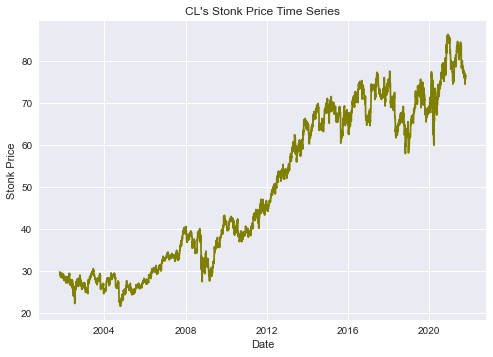

In [491]:
#Look at the stock price throughout history
plt.style.use('seaborn')
plt.ylabel('Stonk Price')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Stonk Price Time Series")
plt.plot(stonkPrices['dates'],stonkPrices['close'],color = 'olive')

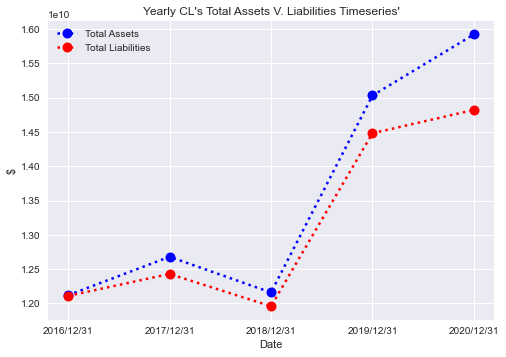

In [492]:
#Now to get the graphs for Yearly Balance Sheet data 

#Plots Assets
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Assets'],color = 'b',
         linewidth = 2.5,marker = '.', markersize = 20, linestyle = 'dotted', label = 'Total Assets')
plt.ylabel('$')
plt.xlabel('Date')

#Plots Liabilities
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Liabilities'],color = 'r',linewidth = 2.5,marker = '.',
        markersize = 20, linestyle = 'dotted', label = 'Total Liabilities')

plt.title(f"Yearly {user_stock}'s Total Assets V. Liabilities Timeseries'")
plt.legend(loc = 'best',shadow = True)

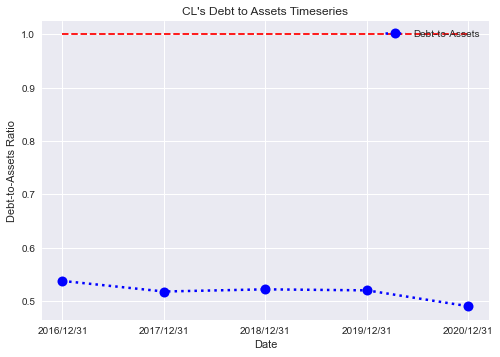

In [493]:
#Debt to Assets Ratio
DebtAssets = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Assets'][val]
    DebtAssets.append(numerator/denominator)
    
#Plots debt to assets ratio
plt.plot(BalanceSheetDataFrame['Years'],DebtAssets,color = 'b', linewidth = 2.5, marker = '.',
         markersize = 20,linestyle = 'dotted', label = 'Debt-to-Assets')
plt.ylabel('Debt-to-Assets Ratio')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Debt to Assets Timeseries")
plt.legend(loc = 'best',shadow = True)
plt.hlines(1,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'r')

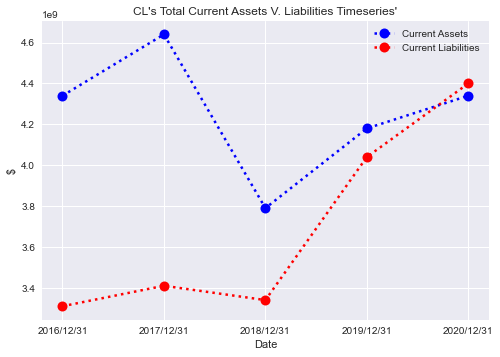

In [494]:
#Plots Current Ratio
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Current_Assets'],color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Current Assets')
plt.ylabel('$')
plt.xlabel('Date')

#Plots Liabilities
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Current_Liabilities'],color = 'r',
         linewidth = 2.5,marker = '.', markersize = 20,linestyle = 'dotted', label = 'Current Liabilities')

plt.title(f"{user_stock}'s Total Current Assets V. Liabilities Timeseries'")
plt.legend(loc = 'best',shadow = True)

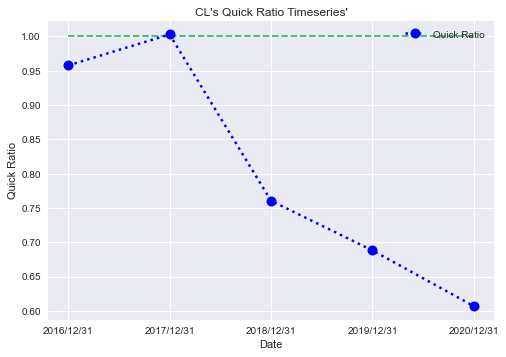

In [495]:
#Timeseries Graph for Quick Ratio
if(sector == 'Financial Services'):
    pass
elif(sector == 'Real Estate'):
    pass
else:
    Acid = []
    for val in range(0,len(BalanceSheetDataFrame['Total_Current_Assets']),1):
        numerator = BalanceSheetDataFrame['Total_Current_Assets'][val] - BalanceSheetDataFrame['Inventories'][val]
        denominator = BalanceSheetDataFrame['Total_Current_Liabilities'][val]
        Acid.append(numerator/denominator)

    #Plots Debt to Equity Timseseries
    plt.plot(BalanceSheetDataFrame['Years'],Acid,color = 'b',linewidth = 2.5,
             marker = '.', markersize = 20, linestyle = 'dotted', label = 'Quick Ratio')

    plt.hlines(1,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'mediumseagreen')
    plt.ylabel('Quick Ratio')
    plt.xlabel('Date')
    plt.title(f"{user_stock}'s Quick Ratio Timeseries'")
    plt.legend(loc = 'best',shadow = True)


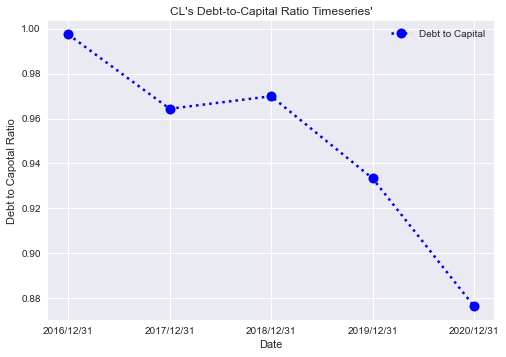

In [496]:
#Debt-to-Capital  Ratio Timeseries, should be below 1 to show they're under leveraged
DebtCap = []
for val in range(0,len(BalanceSheetDataFrame['Total_Debt']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Debt'][val] + BalanceSheetDataFrame['Total_Equity'][val]
    DebtCap.append((numerator/denominator))
    
#Plots Debt to Capital Timseseries
plt.plot(BalanceSheetDataFrame['Years'],DebtCap,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Debt to Capital')
plt.ylabel('Debt to Capotal Ratio')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Debt-to-Capital Ratio Timeseries'")
plt.legend(loc = 'best',shadow = True)

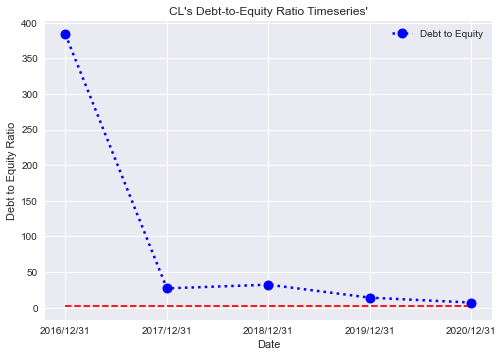

In [497]:
#Gets the Debt to Equity Ratio Timeseries
DebtEquity = []
for val in range(0,len(BalanceSheetDataFrame['Total_Debt']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Equity'][val]
    DebtEquity.append((numerator/denominator))
    
#Plots Debt to Equity Timseseries
plt.plot(BalanceSheetDataFrame['Years'],DebtEquity,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Debt to Equity')
plt.ylabel('Debt to Equity Ratio')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Debt-to-Equity Ratio Timeseries'")
plt.legend(loc = 'best',shadow = True)
plt.hlines(2,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'r')

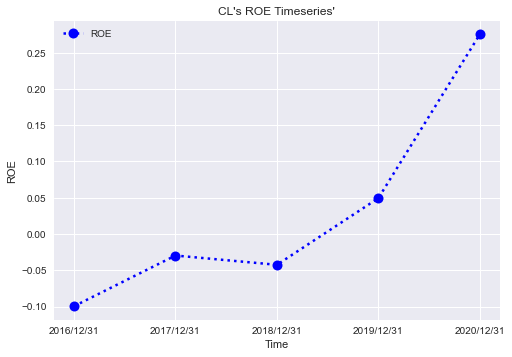

In [498]:
#Gets the Timeseries of the ROE for the stock
roe = []
for val in range(0,len(IncomeDataFrame['Net_Income']),1):
    numerator = BalanceSheetDataFrame["Shareholder's_Equity"][val]
    denominator = IncomeDataFrame['Net_Income'][val]
    roe.append((numerator/denominator))
    
#Plots the ROE
plt.plot(BalanceSheetDataFrame['Years'],roe,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'ROE')
plt.title(f"{user_stock}'s ROA Timeseries'")
plt.title(f"{user_stock}'s ROE Timeseries'")
plt.xlabel('Time')
plt.ylabel('ROE')
plt.legend(loc = 'best',shadow = True)

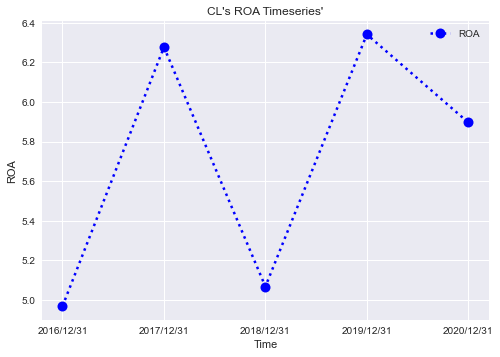

In [499]:
#Gets the Return on Assets timeseries for the stock
incomeAssets = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame['Total_Assets'][val]
    denominator = IncomeDataFrame['Net_Income'][val]
    incomeAssets.append((numerator/denominator))
    
#Plots the ROA
plt.plot(BalanceSheetDataFrame['Years'],incomeAssets,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'ROA')
plt.title(f"{user_stock}'s ROA Timeseries'")
plt.xlabel('Time')
plt.ylabel('ROA')
plt.legend(loc = 'best',shadow = True)

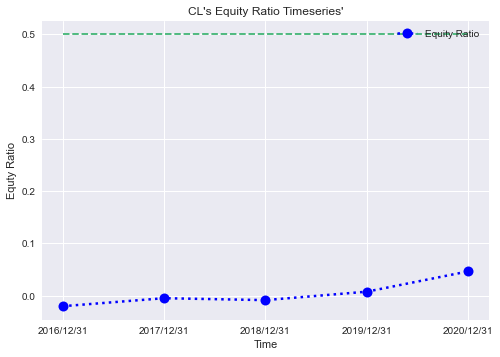

In [500]:
#Gets the Equity Ratio Timeseries
equityRatio = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame["Shareholder's_Equity"][val]
    denominator = BalanceSheetDataFrame['Total_Assets'][val]
    equityRatio.append((numerator/denominator))
    
#Plots the Equity Ratio
plt.plot(BalanceSheetDataFrame['Years'],equityRatio,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Equity Ratio')
plt.title(f"{user_stock}'s Equity Ratio Timeseries'")
plt.xlabel('Time')
plt.ylabel('Equty Ratio')
plt.legend(loc = 'best',shadow = True)
plt.hlines(.5,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'mediumseagreen')

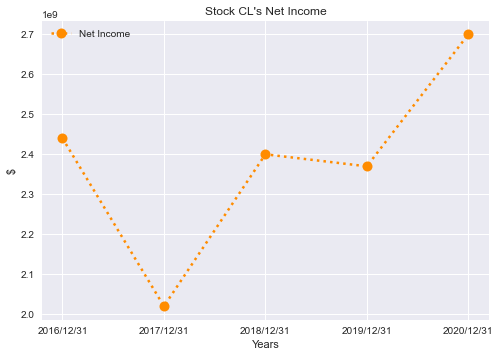

In [501]:
#Now to get the graph for the Net Income
plt.plot(IncomeDataFrame['Years'],IncomeDataFrame['Net_Income'],color = 'darkorange',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Net Income'
        )

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Net Income".format(user_stock))
plt.legend(loc = 'best',shadow = True)

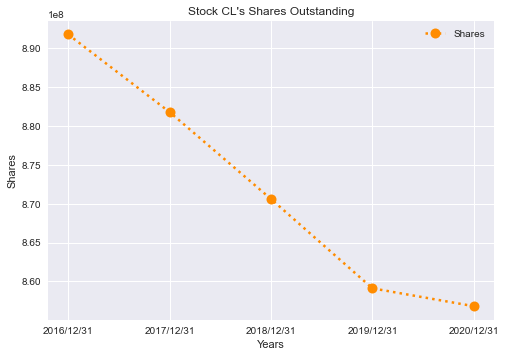

In [502]:
#Gets the Total Revenue of the Company
plt.plot(IncomeDataFrame['Years'],IncomeDataFrame['Shares'],color = 'darkorange',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Shares')

plt.xlabel('Years')
plt.ylabel('Shares')
plt.title("Stock {0}'s Shares Outstanding".format(user_stock))
plt.legend(loc = 'best',shadow = True)

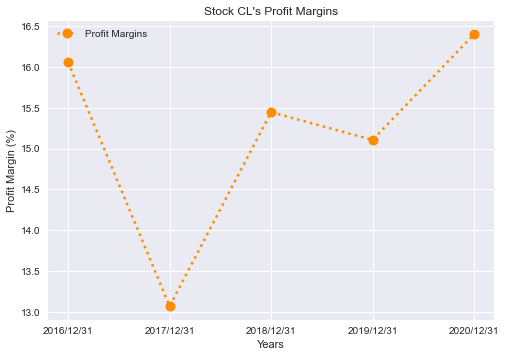

In [503]:
#Gets the Net Profit Margin Year over Year
profitMargins = [100 * (IncomeDataFrame['Net_Income'][i] / IncomeDataFrame['Revenue'][i]) for i in range(0,len(IncomeDataFrame['Revenue']),1)]
plt.plot(IncomeDataFrame['Years'],profitMargins,color = 'darkorange',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Profit Margins')

plt.xlabel('Years')
plt.ylabel('Profit Margin (%)')
plt.title("Stock {0}'s Profit Margins".format(user_stock))
plt.legend(loc = 'best',shadow = True)

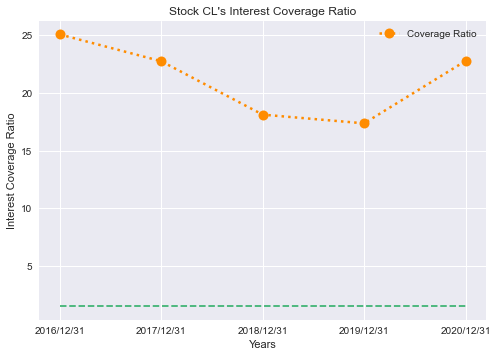

In [504]:
#Gets the Interest Coverage Ratio Timeseries
if(sector == 'Real Estate'):
    pass
elif(sector == 'Financial Services'):
    pass
else:
    coverageRatio = []
    for val in range(0,len(IncomeDataFrame['Years']),1):
        numerator = IncomeDataFrame["Net_Income"][val] + IncomeDataFrame["Income_Tax"][val] + IncomeDataFrame["Interest_Expense"][val]
        denominator = IncomeDataFrame['Interest_Expense'][val]
        coverageRatio.append((numerator/denominator))

    #Plots the coverage ratio
    plt.plot(IncomeDataFrame['Years'],coverageRatio,color = 'darkorange',
             linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Coverage Ratio')

    plt.xlabel('Years')
    plt.ylabel('Interest Coverage Ratio')
    plt.title("Stock {0}'s Interest Coverage Ratio".format(user_stock))
    plt.legend(loc = 'best',shadow = True)
    plt.hlines(1.5,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'mediumseagreen')


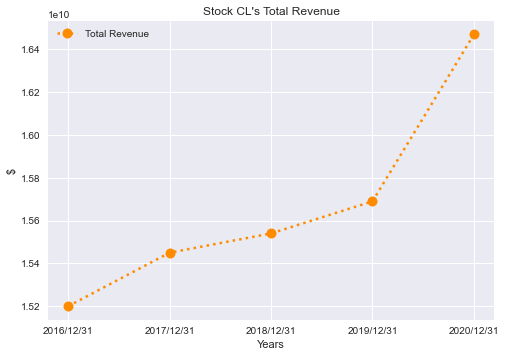

In [505]:
#Gets the shares outstanding timeseries
plt.plot(IncomeDataFrame['Years'],IncomeDataFrame['Revenue'],color = 'darkorange',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Total Revenue')

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Total Revenue".format(user_stock))
plt.legend(loc = 'best',shadow = True)

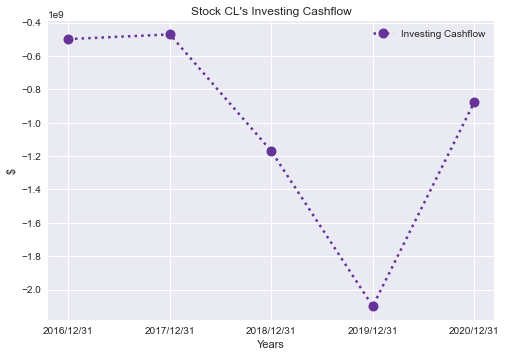

In [506]:
#Now to get the graphs for the investing cashflow 
plt.plot(years,CashFlowDataFrame['Net_Investing_Cashflow'],color = 'rebeccapurple',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Investing Cashflow')

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Investing Cashflow".format(user_stock))
plt.legend(loc = 'best',shadow = True)

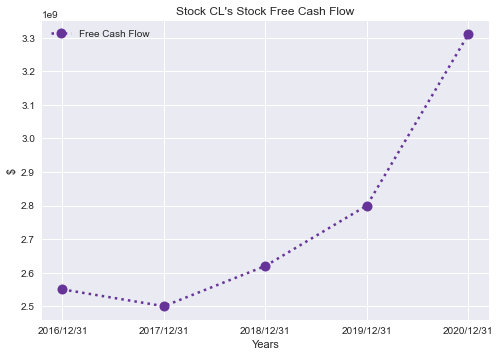

In [507]:
plt.plot(years,CashFlowDataFrame['Free_Cash_Flow'],color = 'rebeccapurple',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Free Cash Flow')

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Stock Free Cash Flow".format(user_stock))
plt.legend(loc = 'best',shadow = True)

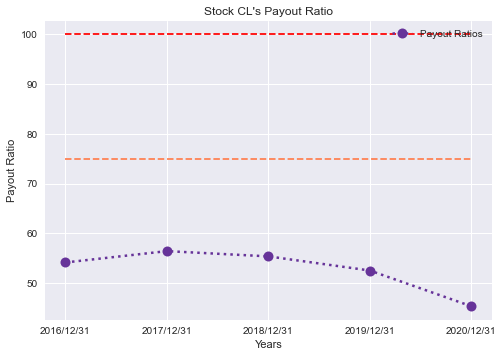

In [508]:
# Shows the payout ratio over time
payoutRatios = (abs(CashFlowDataFrame['Dividends']) / CashFlowDataFrame['Free_Cash_Flow'] ) * 100

plt.plot(years,payoutRatios,color = 'rebeccapurple',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Payout Ratios')
plt.title("Stock {0}'s Payout Ratio".format(user_stock))
plt.xlabel('Years')
plt.ylabel('Payout Ratio')
plt.legend(loc = 'best',shadow = True)
plt.hlines(100,xmin = years[0] , xmax = years[4],linestyle = 'dashed',color = 'red')
plt.hlines(75,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'coral')

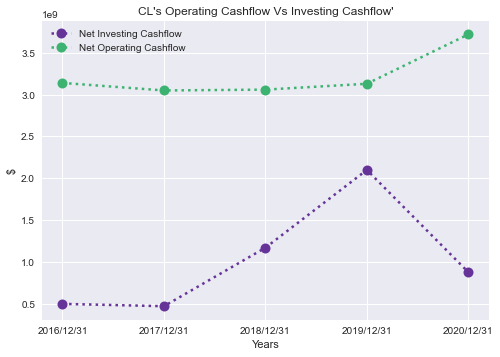

In [509]:
#Net Investing Cashflow Vs Net Operating Cashflow
plt.plot(years,abs(CashFlowDataFrame['Net_Investing_Cashflow']),linewidth = 2.5,marker = '.',color = 'rebeccapurple',
         markersize = 20, linestyle = 'dotted',label = 'Net Investing Cashflow')
plt.plot(years,CashFlowDataFrame['Net_Operating_Cashflow'],linewidth = 2.5,marker = '.',color = 'mediumseagreen',
         markersize = 20, linestyle = 'dotted',label = 'Net Operating Cashflow')
plt.xlabel('Years')
plt.ylabel('$')
plt.title(f"{user_stock}'s Operating Cashflow Vs Investing Cashflow'")
plt.legend(loc = 'best',shadow = True)

    Years  Dividends
0    2000      0.316
1    2001      0.338
2    2002      0.360
3    2003      0.450
4    2004      0.480
5    2005      0.555
6    2006      0.625
7    2007      0.700
8    2008      0.780
9    2009      0.860
10   2010      1.015
11   2011      1.135
12   2012      1.220
13   2013      1.330
14   2014      1.420
15   2015      1.500
16   2016      1.550
17   2017      1.590
18   2018      1.660
19   2019      1.710
20   2020      1.750


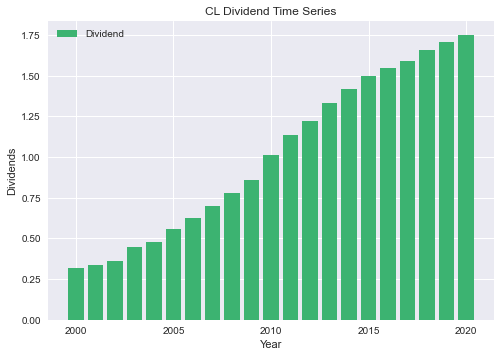

In [510]:
#Now to get the graphs for dividend data
print(dividendData)
plt.bar(dividendData['Years'],dividendData['Dividends'],color = 'mediumseagreen',
        label = 'Dividend',align = 'center')
plt.title(f'{user_stock} Dividend Time Series')
plt.xlabel('Year')
plt.ylabel('Dividends')
plt.legend(loc = 'best',shadow = True)

The 5 Yr Dividend CAGR is: 3.0835975909703772


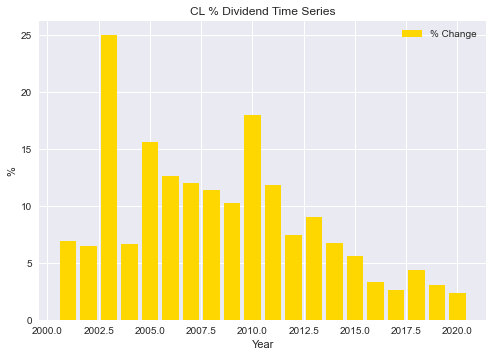

In [511]:
#Percent Change for dividend change
plt.bar(dividendData['Years'],[100* i for i in dividendData['Dividends'].pct_change()],color = 'gold',
        label = '% Change',align = 'center')
plt.title(f'{user_stock} % Dividend Time Series')
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(loc = 'best',shadow = True)
#print([100* i for i in dividendData['Dividends'].pct_change()])

if(len([100* i for i in dividendData['Dividends'].pct_change()]) < 5):
    print('The Dividend CAGR is: ',np.nanmean([100* i for i in dividendData['Dividends'].pct_change()]))
else:
    print('The 5 Yr Dividend CAGR is:',np.nanmean(dividendData['Dividends'][-5:].pct_change()) * 100)

The Expected Percent Off from the Analyst Estimate is:  1.5564153156516527
3.1900000000000004
3.239649648569288


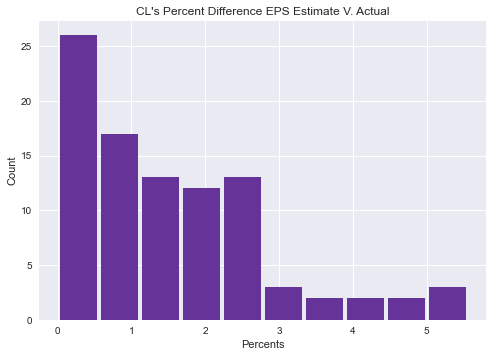

In [512]:
#This is the Probability Distribution of the difference between Trailing EPS estimate vs actual
plt.hist(list(trailingEPS['Trailing_EPS_Per']),color = 'rebeccapurple',rwidth = .9)
plt.title(f"{user_stock}'s Percent Difference EPS Estimate V. Actual")
plt.xlabel('Percents')
plt.ylabel('Count')

print('The Expected Percent Off from the Analyst Estimate is: ',statistics.mean(trailingEPS['Trailing_EPS_Per']))
print(estimate)

newEstimate = ((statistics.mean(trailingEPS['Trailing_EPS_Per'])/100) + 1) * estimate
medianEstimate = ((statistics.median(trailingEPS['Trailing_EPS_Per'])/100) + 1) * estimate
print(newEstimate)

In [513]:
#Assuming we got a normal distribution, this block will get the 95% confidence interval of difference in EPS
#create 95% confidence interval for population mean weight
interval = scipy.stats.t.interval(alpha=0.95, df=len(trailingEPS['Trailing_EPS_Per'])-1,
                       loc=np.mean(trailingEPS['Trailing_EPS_Per']),
                       scale=scipy.stats.sem(trailingEPS['Trailing_EPS_Per']))

#Gets the lower bound & upper bound of the confidence interval as a range of optimistic and pessimistic outlooks on
#Earnings per Share

estimateOpt = ((interval[0]/100) + 1) * estimate
estimatePes = ((interval[1]/100) + 1) * estimate

print(estimateOpt)
print(estimatePes)

3.2309719589898425
3.2483273381487345


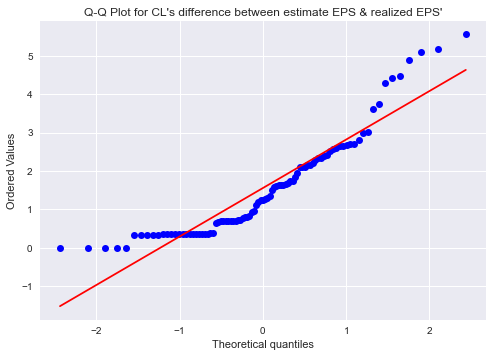

In [514]:
#This block of code does the Q-Q Plot to visualize for normality
scipy.stats.probplot(trailingEPS['Trailing_EPS_Per'],dist = "norm",plot = pylab)
plt.title(f"Q-Q Plot for {user_stock}'s difference between estimate EPS & realized EPS'")
print('')

In [515]:
#This block of code conducts the Shapiro Wilk test for normality is difference of Eps estimate and actual
shapiroTest = scipy.stats.shapiro(trailingEPS['Trailing_EPS_Per'])

#Tells if distribution is normally distributed or not
if(shapiroTest.pvalue > 0.05):
    print('The Percent Difference between Estimate & Realized EPS is Normally Distributed, P-Value: ',shapiroTest.pvalue )
else:
    print('The Percent Difference between Estimate & Realized EPS is not Normally Distributed, P-Value: ',shapiroTest.pvalue )
    
    

The Percent Difference between Estimate & Realized EPS is not Normally Distributed, P-Value:  4.377137372557627e-07


PE Ratio 5 Number Summary: 
count    3648.000000
mean       25.205535
std         6.804465
min        15.040983
25%        20.395121
50%        24.816254
75%        27.076677
max        48.561288
Name: PE, dtype: float64
The Mean PE Ratio:  25.205535023050185
The current PE ttm Ratios is:  23.90282131661442
The Forward PE Ratio is: 23.902821316614418
The Median PE Ratio is:  23.608934169278996


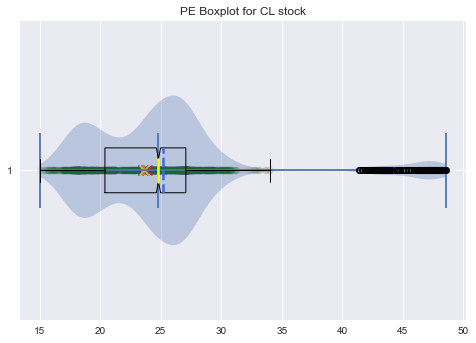

In [516]:
#PE Box plot
PESeq = [1 for i in range(0,len(PEdates['PE']),1)]
plt.boxplot(PEdates['PE'],notch = True,vert = False,showmeans = True,meanline = True,
                 meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
plt.scatter(PEdates['PE'],PESeq,color = 'darkgreen',alpha = .05)
plt.scatter(currPE,1,color = 'r',marker = 'x',s = 100)
plt.scatter((stonkPrices['close'][-1])/newEstimate,1,color = 'rebeccapurple',marker = 'x',s = 100)
plt.scatter((stonkPrices['close'][-1])/estimateOpt,1,color = 'darkorange',marker = '|', s = 100)
plt.scatter((stonkPrices['close'][-1])/estimatePes,1,color = 'darkorange',marker = '|', s = 100)
plt.scatter((stonkPrices['close'][-1])/medianEstimate,1,color = 'gold',marker = 'x', s = 100)
plt.violinplot(PEdates['PE'],vert = False, showmedians = True)
plt.title(f'PE Boxplot for {user_stock} stock')

print('PE Ratio 5 Number Summary: ') 
print(pd.Series(PEdates['PE']).describe())
print("The Mean PE Ratio: ",statistics.mean(PEdates['PE']))
print("The current PE ttm Ratios is: ",currPE)
print('The Forward PE Ratio is:',(stonkPrices['close'][-1])/estimate)
print('The Median PE Ratio is: ',(stonkPrices['close'][-1])/medianEstimate)

The PB Ratio 5 number Summary: 
count    3838.000000
mean     -141.750041
std      1436.230414
min     -7723.000336
25%        14.128224
50%        20.778931
75%        78.770833
max      3722.000122
dtype: float64
The Mean PB Ratio:  -141.75004054275865
The current PB Ratio is:  74.75490196078431


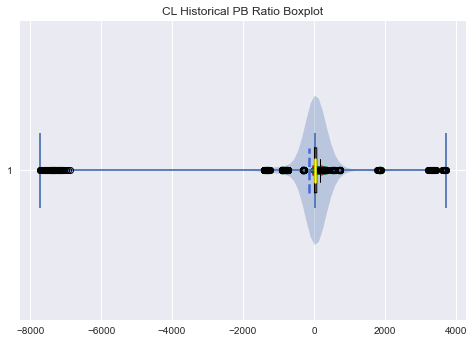

In [517]:
#PB Ratio Boxplot
PBSeq = [1 for i in range(0,len(pbs),1)]

##BoxPlots for PB ratios

#PE Boxplot
plt.boxplot(pbs, notch = True,vert = False,showmeans = True,meanline = True,
                 meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
plt.scatter(pbs,PBSeq,color = 'darkgreen',alpha = .05)
plt.title('{0} Historical PB Ratio Boxplot'.format(user_stock))
plt.scatter(currPB,1,color = 'r',marker = 'x',s = 100)

#PE Violinplot
plt.violinplot(pbs,vert = False, showmedians = True)

print("The PB Ratio 5 number Summary: ")
print(pd.Series(pbs).describe())
print("The Mean PB Ratio: ",statistics.mean(pbs))
print("The current PB Ratio is: ",currPB)

P/FFO Ratio 5 Number Summary: 
count    1205.000000
mean       22.044517
std         1.600445
min        17.636305
25%        20.889626
50%        22.027429
75%        22.871902
max        27.390581
dtype: float64
The Mean P/FFO Ratio:  22.044517131877555
The Current P/FFO is:  20.1701142327879


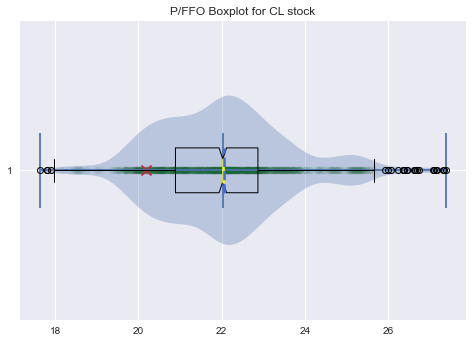

In [518]:
#Make FFO for REITs
if(sector == 'Financial Services'):
    pass
else:
    PffoSeq = [1 for i in range(0,len(pFFO[1:]),1)]
    plt.boxplot(pFFO[1:],notch = True,vert = False,showmeans = True,meanline = True,
                     meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                    medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
    
    plt.scatter(pFFO[1:],PffoSeq,color = 'darkgreen',alpha = .05)
    plt.scatter(pffo,1,color = 'r',marker = 'x',s = 100)
    plt.violinplot(pFFO[1:],vert = False, showmedians = True)
    plt.title(f'P/FFO Boxplot for {user_stock} stock')

    print('P/FFO Ratio 5 Number Summary: ') 
    print(pd.Series(pFFO[1:]).describe())
    print("The Mean P/FFO Ratio: ",np.nanmean(pFFO[1:]))
    print("The Current P/FFO is: ", pffo)

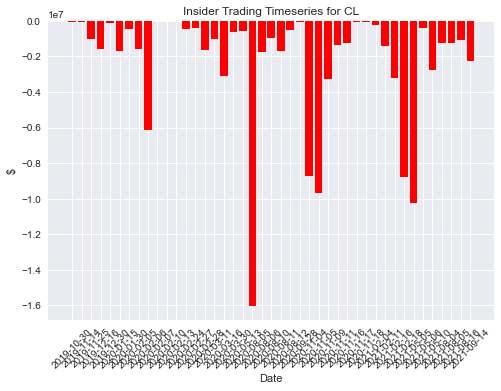

In [519]:
#Gets the bar chart for Insider Trading
plt.bar(insiderDF['Date'],insiderDF['Exchange'],color = insiderDF['Color'])
plt.xlabel('Date')
plt.ylabel('$')
plt.title(f'Insider Trading Timeseries for {user_stock}')
plt.xticks(rotation = 45)
print(' ')